## 모델 생성

## 모델1 생성

Found 551 files belonging to 4 classes.
클래스: ['Frida_Kahlo', 'Gustav_Klimt', 'Kazimir_Malevich', 'Paul_Klee']


c:\2ndPrj\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 531ms/step - accuracy: 0.2666 - loss: 1.5229 - val_accuracy: 0.4563 - val_loss: 1.1603
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 489ms/step - accuracy: 0.3944 - loss: 1.1770 - val_accuracy: 0.4951 - val_loss: 1.0246
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - accuracy: 0.4823 - loss: 1.0795 - val_accuracy: 0.5534 - val_loss: 1.0361
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.5258 - loss: 0.9966 - val_accuracy: 0.4951 - val_loss: 1.2280
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.5473 - loss: 0.9538 - val_accuracy: 0.5825 - val_loss: 1.0328


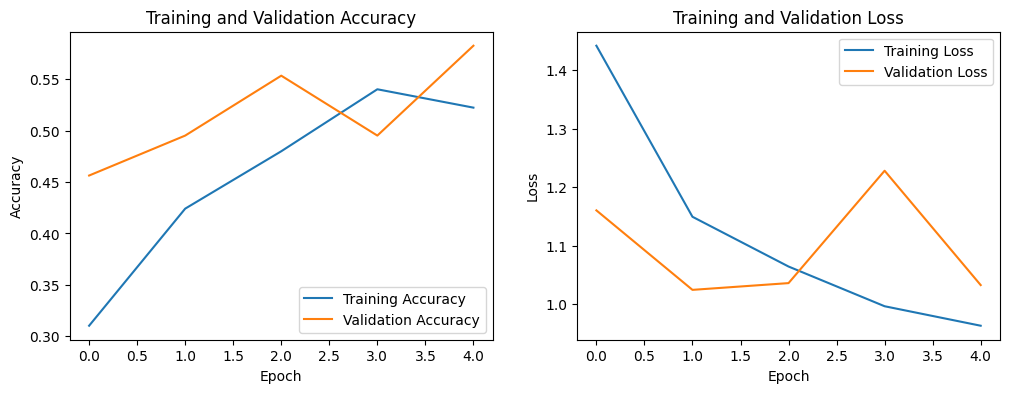

모델이 저장되었습니다!


In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers

# -----------------------------
# 1. 손상 이미지 확실히 제거
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
            if img.mode not in ['RGB', 'RGBA', 'L']:  # 3채널, 4채널, 흑백만 허용
                print(f"삭제 대상(채널 문제): {file_path}, 모드: {img.mode}")
                return False
        return True
    except Exception as e:
        print(f"삭제 대상(불러오기 실패): {file_path}, 이유: {e}")
        return False


for artist in os.listdir("p"):
    folder_path = os.path.join("p", artist)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if not is_valid_image(fpath):
            os.remove(fpath)


# -----------------------------
# 2. 경로 및 하이퍼파라미터
data_dir = pathlib.Path('./p')
img_height = 180
img_width = 180
batch_size = 64

# -----------------------------
# 3. 손상 제거 후 "다시" 데이터 로딩
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 클래스 확인
class_names = full_ds.class_names
num_classes = len(class_names)
print("클래스:", class_names)

# -----------------------------
# 4. train/val 분할
AUTOTUNE = tf.data.AUTOTUNE
total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_size = int(0.8 * total_batches)
train_ds = full_ds.take(train_size).shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = full_ds.skip(train_size).prefetch(buffer_size=AUTOTUNE)

# -----------------------------
# 5. 모델 구성 및 학습
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 6. 학습 실행
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)

# -----------------------------
# 7. 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# -----------------------------
# 8. 모델 저장
os.makedirs('./model', exist_ok=True)
model.save('./model/painting2_classification_model.h5')
print("모델이 저장되었습니다!")

## 모델1 테스트

저장된 모델이 성공적으로 로드되었습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
이 이미지는 'Paul_Klee' (29.20% 확률) 입니다.


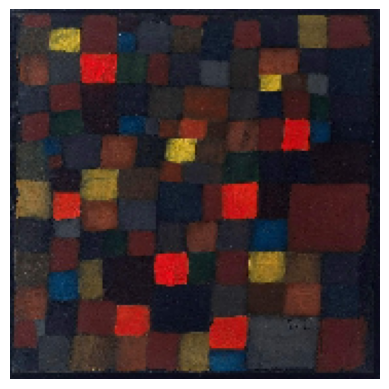

In [22]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model
model_path = './model/painting2_classification_model.h5'  # 저장된 모델 경로
loaded_model = load_model(model_path)
print("저장된 모델이 성공적으로 로드되었습니다.")

# 저장된 모델을 활용한 이미지 예측 함수
def predict_pet_with_loaded_model(img_path, model, class_names):
    """
    이미지 경로와 모델을 입력받아 예측 결과를 출력하고 이미지를 시각화하는 함수.
    Parameters:
        img_path (str): 예측할 이미지 파일 경로.
        model (tf.keras.Model): 저장된 모델.
        class_names (list): 클래스 이름 리스트.
    """
    # 이미지 로드 및 전처리
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가

    # 예측 수행
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # 예측 결과 출력
    print(
        "이 이미지는 '{}' ({:.2f}% 확률) 입니다."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

    # 이미지 시각화
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 테스트 이미지 경로

# test_image_path = './p/Frida_Kahlo/Frida_Kahlo_.jpg'
# test_image_path = './p/Gustav_Klimt/Gustav_Klimt_3.jpg'
# test_image_path = './p/Kazimir_Malevich/Kazimir_Malevich_72.jpg'
test_image_path = './p/Paul_Klee/Paul_Klee_177.jpg'
# Kazimir_Malevich, Paul_Klee
# 예측 실행
predict_pet_with_loaded_model(test_image_path, loaded_model, class_names)


## 앤디 워홀 추가해서 다시 모델 생성

Found 615 files belonging to 4 classes.
클래스: ['Andy_Warhol', 'Frida_Kahlo', 'Kazimir_Malevich', 'Paul_Klee']


c:\2ndPrj\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 484ms/step - accuracy: 0.3512 - loss: 1.7891 - val_accuracy: 0.3592 - val_loss: 1.2580
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.3961 - loss: 1.2246 - val_accuracy: 0.4466 - val_loss: 1.1509
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - accuracy: 0.4926 - loss: 1.1298 - val_accuracy: 0.5340 - val_loss: 1.1175
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.5701 - loss: 1.0320 - val_accuracy: 0.4854 - val_loss: 1.1617
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.5992 - loss: 0.9463 - val_accuracy: 0.5049 - val_loss: 1.1738
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.5500 - loss: 0.9953 - val_accuracy: 0.6311 - val_loss: 1.0541
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - accuracy: 0.6026 - loss: 0.9247 - val_accuracy: 0.6699 - val_loss: 0.7616
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 451ms/step - accuracy: 0.6088 - loss: 0.9138 - val_accuracy: 0.5728 - val_loss:

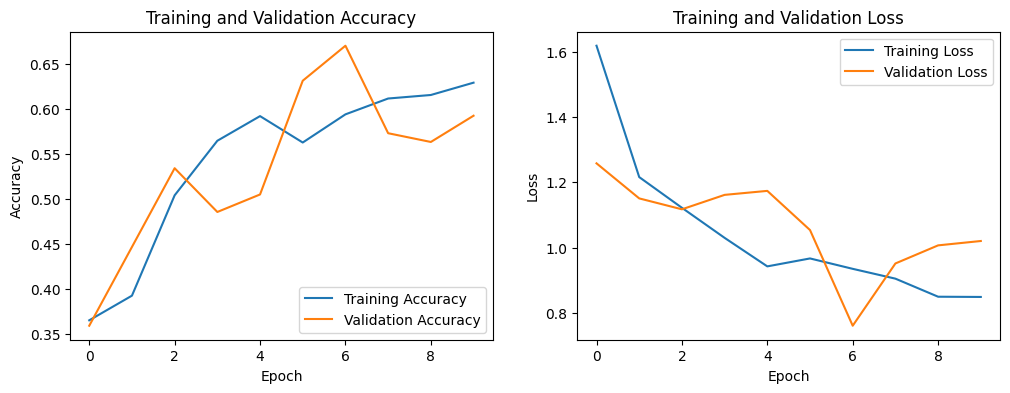

모델이 저장되었습니다!


In [27]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers

# -----------------------------
# 1. 손상 이미지 확실히 제거
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
            if img.mode not in ['RGB', 'RGBA', 'L']:  # 3채널, 4채널, 흑백만 허용
                print(f"삭제 대상(채널 문제): {file_path}, 모드: {img.mode}")
                return False
        return True
    except Exception as e:
        print(f"삭제 대상(불러오기 실패): {file_path}, 이유: {e}")
        return False


for artist in os.listdir("p2"):
    folder_path = os.path.join("p2", artist)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if not is_valid_image(fpath):
            os.remove(fpath)


# -----------------------------
# 2. 경로 및 하이퍼파라미터
data_dir = pathlib.Path('./p2')
img_height = 180
img_width = 180
batch_size = 64

# -----------------------------
# 3. 손상 제거 후 "다시" 데이터 로딩
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 클래스 확인
class_names = full_ds.class_names
num_classes = len(class_names)
print("클래스:", class_names)

# -----------------------------
# 4. train/val 분할
AUTOTUNE = tf.data.AUTOTUNE
total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_size = int(0.8 * total_batches)
train_ds = full_ds.take(train_size).shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = full_ds.skip(train_size).prefetch(buffer_size=AUTOTUNE)

# -----------------------------
# 5. 모델 구성 및 학습
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 6. 학습 실행
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)

# -----------------------------
# 7. 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# -----------------------------
# 8. 모델 저장
os.makedirs('./model', exist_ok=True)
model.save('./model/painting3_classification_model.h5')
print("모델이 저장되었습니다!")

## 모델2 테스트

저장된 모델이 성공적으로 로드되었습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
이 이미지는 'Andy_Warhol' (31.86% 확률) 입니다.


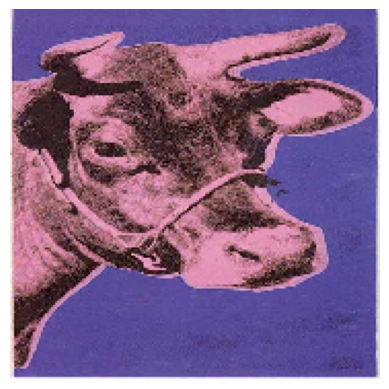

In [ ]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

model_path = './model/painting3_classification_model.h5'  # 저장된 모델 경로
loaded_model = load_model(model_path)
print("저장된 모델이 성공적으로 로드되었습니다.")

# 저장된 모델을 활용한 이미지 예측 함수
def predict_pet_with_loaded_model(img_path, model, class_names):
    # 이미지 로드 및 전처리
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가

    # 예측 수행
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # 예측 결과 출력
    print(
        "이 이미지는 '{}' ({:.2f}% 확률) 입니다."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

    # 이미지 시각화
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 테스트 이미지 경로

# test_image_path = './p/Frida_Kahlo/Frida_Kahlo_.jpg'
test_image_path = './p/Andy_Warhol/Andy_Warhol_7.jpg'
# test_image_path = './p/Kazimir_Malevich/Kazimir_Malevich_72.jpg'
# test_image_path = './p/Paul_Klee/Paul_Klee_177.jpg'
# Kazimir_Malevich, Paul_Klee , Andy_Warhol
# 예측 실행
predict_pet_with_loaded_model(test_image_path, loaded_model, class_names)


## Dali추가해서 최종 모델 생성

Found 628 files belonging to 4 classes.
클래스: ['Andy_Warhol', 'Frida_Kahlo', 'Paul_Klee', 'Salvador_Dali']


c:\2ndPrj\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 542ms/step - accuracy: 0.3033 - loss: 1.7238 - val_accuracy: 0.3017 - val_loss: 1.2466
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.3668 - loss: 1.2661 - val_accuracy: 0.3362 - val_loss: 1.2601
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.4169 - loss: 1.1441 - val_accuracy: 0.4741 - val_loss: 1.0601
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 512ms/step - accuracy: 0.5733 - loss: 1.0165 - val_accuracy: 0.5345 - val_loss: 0.9550
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/step - accuracy: 0.5871 - loss: 0.9396 - val_accuracy: 0.5086 - val_loss: 1.2457
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.5836 - loss: 0.9032 - val_accuracy: 0.5000 - val_loss: 1.2727
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 522ms/step - accuracy: 0.6057 - loss: 0.8473 - val_accuracy: 0.6207 - val_loss: 1.2367


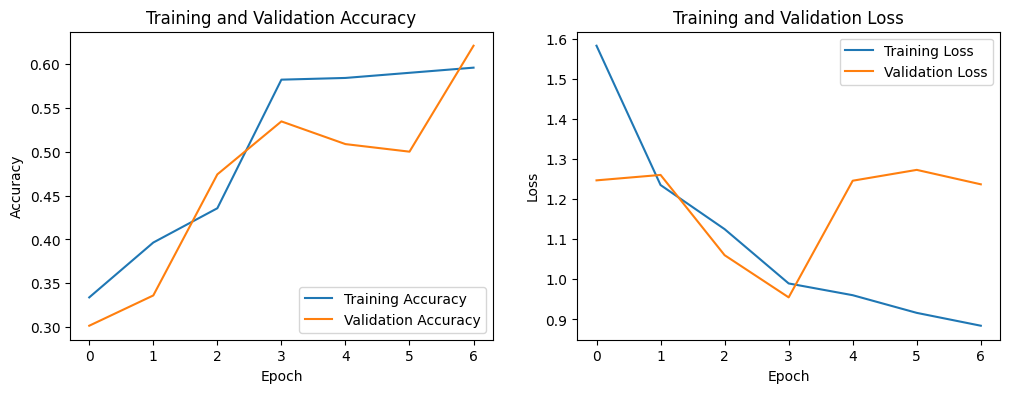

모델이 저장되었습니다!


In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers

# -----------------------------
# 1. 손상 이미지 확실히 제거
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
            if img.mode not in ['RGB', 'RGBA', 'L']:  # 3채널, 4채널, 흑백만 허용
                print(f"삭제 대상(채널 문제): {file_path}, 모드: {img.mode}")
                return False
        return True
    except Exception as e:
        print(f"삭제 대상(불러오기 실패): {file_path}, 이유: {e}")
        return False


for artist in os.listdir("p2"):
    folder_path = os.path.join("p2", artist)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if not is_valid_image(fpath):
            os.remove(fpath)


# -----------------------------
# 2. 경로 및 하이퍼파라미터
data_dir = pathlib.Path('./p2')
img_height = 180
img_width = 180
batch_size = 64

# -----------------------------
# 3. 손상 제거 후 "다시" 데이터 로딩
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 클래스 확인
class_names = full_ds.class_names
num_classes = len(class_names)
print("클래스:", class_names)

# -----------------------------
# 4. train/val 분할
AUTOTUNE = tf.data.AUTOTUNE
total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_size = int(0.8 * total_batches)
train_ds = full_ds.take(train_size).shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = full_ds.skip(train_size).prefetch(buffer_size=AUTOTUNE)

# -----------------------------
# 5. 모델 구성 및 학습
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])
# CNN 모델 구성
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 6. 학습 실행
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)

# -----------------------------
# 7. 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# -----------------------------
# 8. 모델 저장
os.makedirs('./model', exist_ok=True)
model.save('./model/painting4_classification_model.h5')
print("모델이 저장되었습니다!")

## 모델 테스트

저장된 모델이 성공적으로 로드되었습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
이 이미지는 'Paul_Klee' (34.60% 확률) 입니다.


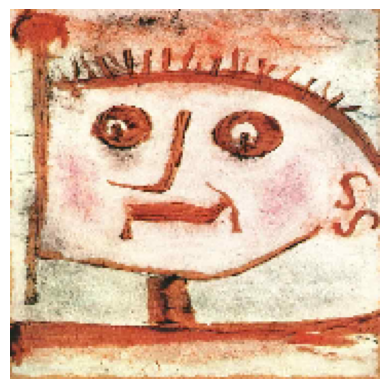

In [7]:
# 모델 테스트 :
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model
model_path = './model/painting4_classification_model.h5'  # 저장된 모델 경로
loaded_model = load_model(model_path)
print("저장된 모델이 성공적으로 로드되었습니다.")

# 저장된 모델을 활용한 이미지 예측 함수
def predict_pet_with_loaded_model(img_path, model, class_names):
    # 이미지 로드 및 전처리
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가

    # 예측 수행
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # 예측 결과 출력
    print(
        "이 이미지는 '{}' ({:.2f}% 확률) 입니다."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

    # 이미지 시각화
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 테스트 이미지 경로
test_image_path = './p2/Paul_Klee/Paul_Klee_50.jpg'
#test_image_path = './p2/Salvador_Dali/Salvador_Dali_50.jpg'

# Andy_Warhol , Frida_Kahlo , Paul_Klee, Salvador_Dali

# 예측 실행
predict_pet_with_loaded_model(test_image_path, loaded_model, class_names)


## 분류 보고서 및 혼동 행렬

Found 615 files belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

분류 보고서 :

               precision  recall  f1-score  support
Andy_Warhol         0.53    0.59      0.56   181.00
Frida_Kahlo         0.58    0.86      0.69   120.00
Paul_Klee           0.23    0.29      0.25   126.00
Salvador_Dali     

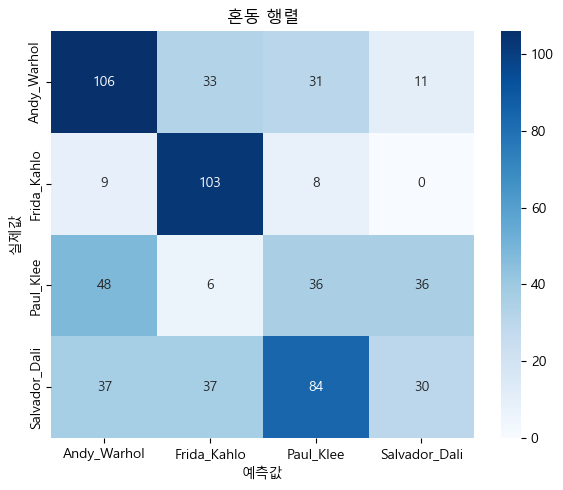

In [4]:
# 분류 보고서 및 혼동 행렬
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

plt.rc('font', family='Malgun Gothic')

# 1. 테스트 데이터셋 불러오기
test_ds = tf.keras.utils.image_dataset_from_directory(
    'p2',
    labels='inferred',
    label_mode='int',
    image_size=(180, 180),  # 모델 입력 크기에 맞게 수정
    batch_size=32,
    shuffle=False
)

# 2. 모델 불러오기
model = load_model('./model/painting4_classification_model.h5')

# 3. 예측값과 실제값 저장
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)
    y_pred.extend(pred_classes)
    y_true.extend(labels.numpy())

# 4. 클래스 이름
class_names = ['Andy_Warhol', 'Frida_Kahlo',  'Paul_Klee','Salvador_Dali']

# 5. 분류 리포트 출력 (표 형태)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("\n분류 보고서 :\n")
print(df_report.round(2))

# 6. 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('혼동 행렬')
plt.tight_layout()
plt.show()


## 클래스 별 데이터 분포

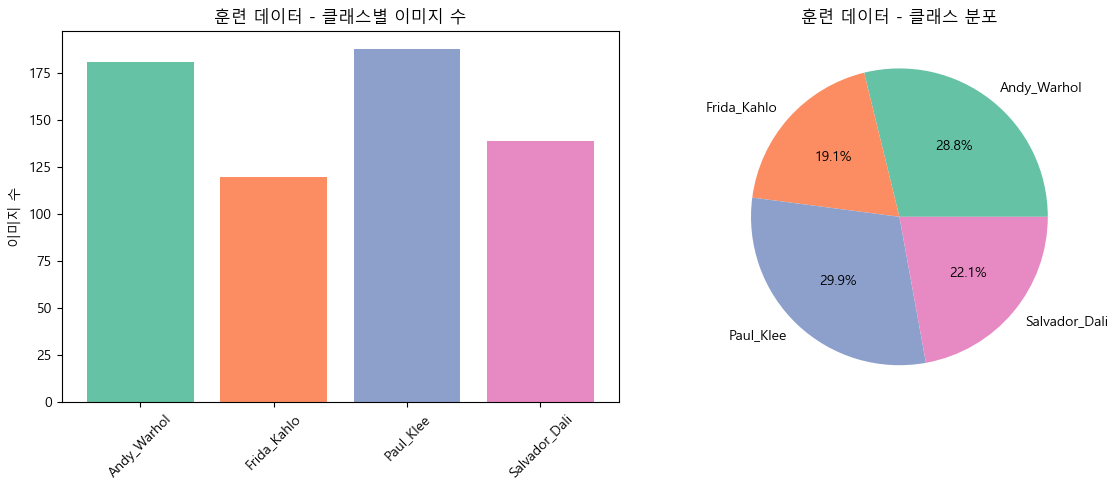

In [10]:
# 클래스 별 데이터 분포 : 
import os
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

# 데이터 경로 (예: 'PetImages' 또는 'Training' 등)
data_dir = 'p2'  # ← 자신의 데이터 폴더명으로 바꾸세요!

# 클래스별 이미지 수 세기
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = count

# 정렬 (선택사항)
class_counts = dict(sorted(class_counts.items()))

# 리스트 분리
labels = list(class_counts.keys())
counts = list(class_counts.values())
colors = plt.cm.Set2.colors  # 색상 세트

# 그래프 출력
plt.figure(figsize=(12, 5))

# 1. 막대 그래프
plt.subplot(1, 2, 1)
bars = plt.bar(labels, counts, color=colors)
plt.title("훈련 데이터 - 클래스별 이미지 수")
plt.ylabel("이미지 수")
plt.xticks(rotation=45)

# 2. 파이 차트
plt.subplot(1, 2, 2)
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("훈련 데이터 - 클래스 분포")

plt.tight_layout()
plt.show()


### 모델 생성 테스트

In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers

# -----------------------------
# 1. 손상 이미지 확실히 제거
def is_valid_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
            if img.mode not in ['RGB', 'RGBA', 'L']:  # 3채널, 4채널, 흑백만 허용
                print(f"삭제 대상(채널 문제): {file_path}, 모드: {img.mode}")
                return False
        return True
    except Exception as e:
        print(f"삭제 대상(불러오기 실패): {file_path}, 이유: {e}")
        return False

for artist in os.listdir("p2"):
    folder_path = os.path.join("p2", artist)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if not is_valid_image(fpath):
            os.remove(fpath)

# -----------------------------
# 2. 경로 및 하이퍼파라미터
data_dir = pathlib.Path('./p2')
img_height = 180
img_width = 180
batch_size = 64

# -----------------------------
# 3. 손상 제거 후 데이터 로딩
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    str(data_dir),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 클래스 확인
class_names = full_ds.class_names
num_classes = len(class_names)
print("클래스:", class_names)

# -----------------------------
# 4. train/val 분할
AUTOTUNE = tf.data.AUTOTUNE
total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_size = int(0.8 * total_batches)
train_ds = full_ds.take(train_size).shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = full_ds.skip(train_size).prefetch(buffer_size=AUTOTUNE)

# -----------------------------
# 5. 데이터 증강 강화
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),          # 좌우 반전
    layers.RandomRotation(0.2),               # 회전
    layers.RandomZoom(0.2),                   # 확대/축소
    layers.RandomBrightness(0.2),             # 밝기 조정
    layers.RandomContrast(0.2),               # 대비 조정
    layers.RandomTranslation(0.1, 0.1),       # 상하좌우 이동
])

# CNN 모델 구성
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),  # 추가 레이어
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # Dropout 비율 증가
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Dense 레이어 크기 증가
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 학습률 조정
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 6. 학습 실행
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# 클래스 가중치 (Andy Warhol: 181, Salvador Dali: 139, Paul Klee: 188, Frida Kahlo: 120)
class_weights = {
    0: 1.0,  # Andy Warhol
    1: 1.3,  # Salvador Dali
    2: 0.95, # Paul Klee
    3: 1.5   # Frida Kahlo
}

epochs = 30  # Epoch 수 증가
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks,
    class_weight=class_weights
)

# -----------------------------
# 7. 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# -----------------------------
# 8. 모델 저장
os.makedirs('./model', exist_ok=True)
model.save('./model/painting4_classification_model.h5')
print("모델이 저장되었습니다!")

## ROC 그래프

Found 615 files belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


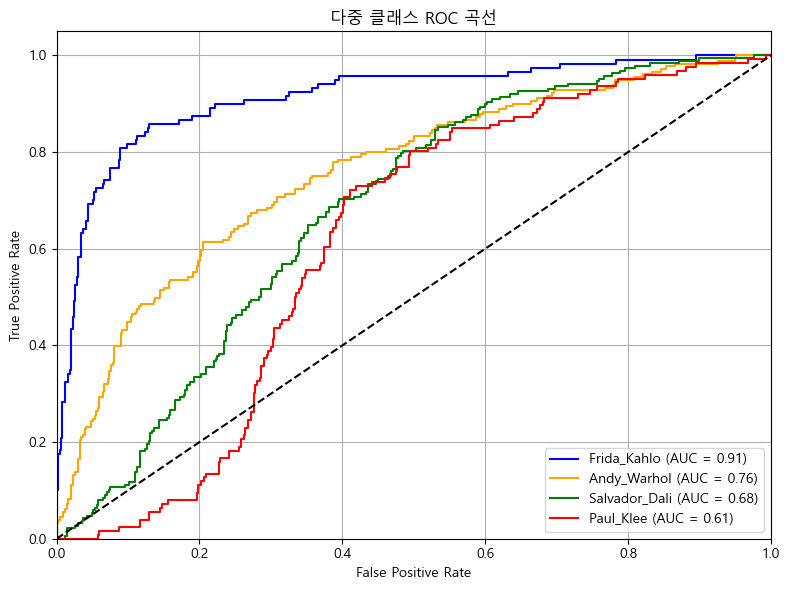

In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import os

# 1. 클래스 이름 (폴더 순서가 보장될 수 있도록 정렬)
class_names = sorted(['Andy_Warhol', 'Frida_Kahlo', 'Paul_Klee', 'Salvador_Dali'])
n_classes = len(class_names)

# 2. 테스트 데이터 로드
test_ds = tf.keras.utils.image_dataset_from_directory(
    'p2',
    labels='inferred',
    label_mode='int',
    image_size=(180, 180),
    batch_size=32,
    shuffle=False  # 순서를 맞춰야 ROC 계산 가능
)

# 3. 모델 로드
model = load_model('./model/painting4_classification_model.h5')

# 4. 예측 확률 및 실제값 수집
y_score = []
y_true = []

for images, labels in test_ds:
    probs = model.predict(images)  # 예측 확률 (softmax)
    y_score.extend(probs)
    y_true.extend(labels.numpy())

y_score = np.array(y_score)
y_true = np.array(y_true)

# 5. 실제값 one-hot 변환
y_true_onehot = label_binarize(y_true, classes=list(range(n_classes)))

# 6. ROC 계산
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 7. AUC 기준으로 클래스 정렬 (내림차순)
# (클래스 이름, FPR, TPR, AUC)를 리스트로 저장
roc_data = [(class_names[i], fpr[i], tpr[i], roc_auc[i]) for i in range(n_classes)]
# AUC 기준으로 내림차순 정렬
roc_data_sorted = sorted(roc_data, key=lambda x: x[3], reverse=True)

# 8. 색상 정의 (정렬된 순서에 따라 고정된 색상 사용)
colors = ['blue', 'orange', 'green', 'red']  # 클래스별 고정 색상

# 9. 시각화
plt.figure(figsize=(8, 6))
for idx, (class_name, fpr_val, tpr_val, auc_val) in enumerate(roc_data_sorted):
    plt.plot(fpr_val, tpr_val, color=colors[idx], label=f'{class_name} (AUC = {auc_val:.2f})')

# 기준선 (대각선)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('다중 클래스 ROC 곡선')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()